In [2]:
import mysql.connector
from mysql.connector import errorcode

# Database connection configuration
config = {
    'user': 'u548419919_kd',
    'password': 'con',
    'host': '193.203.166.108',
    'database': 'u548419919_property_data'
}

# Establish the database connection
conn = mysql.connector.connect(**config)
cursor = conn.cursor()

ProgrammingError: 1045 (28000): Access denied for user 'u548419919_kd'@'49.37.32.42' (using password: YES)

In [ ]:
!pip install pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 808.8 kB/s eta 0:00:000:00:01


In [ ]:
import pymysql



config = {
    'user': 'u548419919_sh',
    'password': 't/bPkz69U*X2',
    'host': '193.203.166.108',
    'database': 'u548419919_scraper',
    'port': 3306
}


connection = pymysql.connect(
    host=config['host'],
    user=config['user'],
    password=config['password'],
    database=config['database'],
    port=config['port']
)

cursor = connection.cursor()

In [ ]:
import requests

def proxied_request(url, render_js=False):
        PROXY_URL = 'https://proxy.scrapeops.io/v1/'
        API_KEY = 'b1c5b75c-df6c-4883-80ee-6e9243440058'
        return requests.get(
            url=PROXY_URL,
            params={
                'api_key': API_KEY,
                'url': url, 
                # 'residential': 'true', 
                'country': 'us',
                'render_js': render_js
            },
        )

In [ ]:
x = proxied_request('https://www.zillow.com/homes/5131-HARLAN-STREET-PHILADELPHIA-PA-19131_rb/10441289_zpid')

In [ ]:
from bs4 import BeautifulSoup
import re
# soup = BeautifulSoup(x.text, 'html.parser')


In [ ]:
from typing import List


def get_zesttimate(address):
    url = f'https://www.zillow.com/homes/{address.replace(" ", "-").replace("/", "-")}_rb'
    response = proxied_request(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    prices: List[BeautifulSoup] = soup.find_all(string="Zestimate")
    if not prices:
        prices : List[BeautifulSoup] =  soup.find_all(string='Est. ')
    for price in prices:
        parent = price
        for i in range(3):
            parent = parent.find_parent()
            parent_text = parent.__str__()
            match = re.search(r'\$\d[\d,]*', parent_text)
            if match:
                zestimate = match.group()
                return zestimate

    return None

[]


<!DOCTYPE html>
<html lang="en"><head><script id="web-platform-datadog-rum-init">
    (function(h,o,u,n,d) {
      h=h[d]=h[d]||{q:[],onReady:function(c){h.q.push(c)}}
      d=o.createElement(u);d.async=1;d.src=n
      n=o.getElementsByTagName(u)[0];n.parentNode.insertBefore(d,n)
    })(window,document,'script','https://www.datadoghq-browser-agent.com/us1/v5/datadog-rum.js','DD_RUM')
    window.DD_RUM.onReady(function() {
        
      
        const shouldSetupDataDogRum = true;
        const paltformDDRumConfig = {
            applicationId: '397ca3c2-26d0-4074-81e4-e475f7f8c445',
            clientToken: 'pub3f8551005ada03059c3150b5e1ac1af2',
            service: 'web-platform-render-building-page-sub-app',
            env: 'production',
            sessionSampleRate: 1,
            sessionReplaySampleRate: 0,
            trackUserInteractions: true,
            site: 'datadoghq.com',
            trackResources: true,
            trackLongTasks: true,
            defaultPrivacyLeve
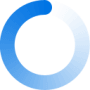

In [ ]:
x = get_zesttimate('2527 N 32ND STREET PHILADELPHIA PA 19132')
x

In [ ]:
def fetch_other_details(auction_id):
    url = f"https://www.bid4assets.com/auction/index/{auction_id}"
    response = proxied_request(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    item_specifics_table = soup.find('div', class_='item-specifics-table')
    right_table = item_specifics_table.find('table', class_='pull-right')
    debt_amount = ""
    rows = right_table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        if len(cells) > 1:
            key = cells[0].get_text(strip=True).lower()
            value = cells[1].get_text(strip=True)
            if key == 'debt amount':
                return value
    

In [ ]:
soup = fetch_other_details('1143962')

In [ ]:
import re

address = "1036 Tyson Avenue Abington PA 19001"

# Regular expression pattern for US address format
pattern = r'^(.*),?\s+([A-Z]{2})\s+\d{5}$'

# Search for the pattern in the address
match = re.search(pattern, address)

if match:
    city = match.group(1).strip()
    state = match.group(2)
    country = "United States"
else:
    city = ""
    state = ""
    country = "United States"  # Default assumption

print("City:", city)
print("State:", state)
print("Country:", country)

City: 1036 Tyson Avenue Abington
State: PA
Country: United States


In [ ]:
import re

address = "1036 Tyson Avenue Abington PA 19001"

# Regular expression pattern for US address format
pattern = r'^(.*),?\s+([A-Z]{2})\s+\d{5}$'

# Search for the pattern in the address
match = re.search(pattern, address)

if match:
    city = match.group(1).strip()
    state = match.group(2)
    country = "United States"
else:
    city = ""
    state = ""
    country = "United States"  # Default assumption

print("City:", city)
print("State:", state)
print("Country:", country)

City: 1036 Tyson Avenue Abington
State: PA
Country: United States


In [1]:
from bids_scraper import fetch_bids_data
from main import urls

fetch_bids_data(urls[0])

[2024-06-08 23:34:45,554] [INFO] [bids_scraper.py:51] Starting to scrape data from https://www.bid4assets.com/philaforeclosures.
[2024-06-08 23:34:45,560] [INFO] [bids_scraper.py:14] Fetching existing auction IDs from the database within the last 24 hours.
[2024-06-08 23:34:47,192] [INFO] [bids_scraper.py:25] Fetched 0 auction IDs within the last 24 hours.
[2024-06-08 23:34:47,460] [INFO] [bids_scraper.py:53] Existing auction_ids set()
[2024-06-08 23:34:53,513] [ERROR] [setup.py:82] fetch_bids_data failed on attempt 1: ID or Address column not found in table headers
[2024-06-08 23:34:53,514] [INFO] [setup.py:84] Retrying fetch_bids_data in 10 seconds...


KeyboardInterrupt: 

In [4]:
from setup import log
import requests
from bs4 import BeautifulSoup
def fetch_other_values(auction_id):
    url = f"https://www.bid4assets.com/auction/index/{auction_id}"
    log.info(f"Fetching debt value from {url}")
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    item_specifics_table = soup.find('div', class_='item-specifics-table')
    right_table = item_specifics_table.find('table', class_='pull-right')
    debt_amount = ""
    rows = right_table.find_all('tr')
    ret = [None, None]
    for row in rows:
        cells = row.find_all('td')
        if len(cells) > 1:
            key = cells[0].get_text(strip=True).lower()
            value = cells[1].get_text(strip=True)
            if key == 'debt amount':
                ret[0] = value
            elif key == 'county':
                ret[1] = value
    return ret

In [5]:
fetch_other_values('1143958')

[2024-06-08 23:23:24,011] [INFO] [1356529502.py:6] Fetching debt value from https://www.bid4assets.com/auction/index/1143958


['$37,615.00', 'Philadelphia']

In [7]:
from setup import MySQLConnection


with MySQLConnection() as cursor:
    create_table_query = """
    CREATE TABLE auction_data (
        auction_id INT PRIMARY KEY,
        address VARCHAR(255) NOT NULL,
        current_bid DECIMAL(10, 2),
        debt DECIMAL(10, 2),
        county VARCHAR(100),
        city VARCHAR(100),
        state VARCHAR(2),
        date DATE,
        zestimate DECIMAL(10, 2),
        v_o DECIMAL(10, 2)
    );
    """
    cursor.execute(create_table_query)